In [1]:
!pip3 install geopy
!pip3 install pandas
!pip3 install duckdb
!pip3 install seaborn
!pip3 install plotly
!pip3 install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import duckdb as db
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import dateutil
from dateutil import parser
import pytz
from geopy.geocoders import Nominatim

In [3]:
data = pd.read_csv('./covid_19.csv')
data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [5]:
data['Date'] = data['Date'].map(parser.parse)
data['Date'].head()

0   2020-03-01
1   2020-03-02
2   2020-03-02
3   2020-03-02
4   2020-03-03
Name: Date, dtype: datetime64[ns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         31822 non-null  datetime64[ns]
 1   Location ISO Code            31822 non-null  object        
 2   Location                     31822 non-null  object        
 3   New Cases                    31822 non-null  int64         
 4   New Deaths                   31822 non-null  int64         
 5   New Recovered                31822 non-null  int64         
 6   New Active Cases             31822 non-null  int64         
 7   Total Cases                  31822 non-null  int64         
 8   Total Deaths                 31822 non-null  int64         
 9   Total Recovered              31822 non-null  int64         
 10  Total Active Cases           31822 non-null  int64         
 11  Location Level               31822 non-nu

Cek date time yang di gunakan

In [6]:
data['Date'][0], data['Date'][0].value

(Timestamp('2020-03-01 00:00:00'), 1583020800000000000)

format timezone yang bisa di gunakan

In [7]:
pytz.all_timezones_set

LazySet({'Europe/Kiev', 'America/Adak', 'Africa/Casablanca', 'America/Ensenada', 'America/Inuvik', 'Antarctica/Syowa', 'Africa/Bujumbura', 'Europe/Podgorica', 'America/Campo_Grande', 'Europe/Tirane', 'Pacific/Auckland', 'America/Blanc-Sablon', 'Europe/Rome', 'America/Bahia_Banderas', 'Antarctica/Troll', 'Europe/Jersey', 'Asia/Hovd', 'America/Creston', 'Etc/GMT-0', 'W-SU', 'America/Metlakatla', 'EET', 'Europe/Zurich', 'US/Central', 'Pacific/Fiji', 'Africa/Addis_Ababa', 'America/Havana', 'Asia/Singapore', 'Etc/UCT', 'Arctic/Longyearbyen', 'Europe/Dublin', 'Pacific/Tahiti', 'Antarctica/Casey', 'Africa/Kampala', 'America/North_Dakota/New_Salem', 'America/Indianapolis', 'UCT', 'America/Dawson_Creek', 'Australia/Perth', 'PRC', 'America/Indiana/Vincennes', 'Etc/GMT+1', 'Europe/Tiraspol', 'Antarctica/South_Pole', 'America/Ciudad_Juarez', 'America/Antigua', 'Europe/Busingen', 'Pacific/Saipan', 'Atlantic/St_Helena', 'Africa/Djibouti', 'Africa/Asmara', 'America/Kralendijk', 'America/Argentina/Cat

Melihat Timestmp yang di gunakan

In [8]:
timezone = pytz.timezone('UTC')
epoch_datetime = datetime.datetime.fromtimestamp(
    data['Date'][0].value / 1000000000, timezone
)

non_timezone = datetime.datetime.fromtimestamp(
    data['Date'][0].value / 1000000000
)

print(epoch_datetime, epoch_datetime.tzinfo)
print(non_timezone, non_timezone.tzinfo)

2020-03-01 00:00:00+00:00 UTC
2020-03-01 07:00:00 None


In [9]:
timezone = pytz.timezone('Asia/Jakarta')
epoch_datetime = datetime.datetime.fromtimestamp(
    data['Date'][0].value / 1000000000, timezone
)

non_timezone = datetime.datetime.fromtimestamp(
    data['Date'][0].value / 1000000000
)

print(epoch_datetime, epoch_datetime.tzinfo)

2020-03-01 07:00:00+07:00 Asia/Jakarta


Check Duplikasi

In [10]:
data[data['Special Status'].duplicated()]

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,182.93%,1.00,1.00
3,2020-03-02,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.00,0.00,0.00,0.00%,100.00%,NaN,NaN
4,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,174.42%,1.00,1.00
5,2020-03-03,IDN,Indonesia,0,0,0,0,2,0,0,...,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00%,0.00%,0.00,1.00
6,2020-03-03,ID-JB,Jawa Barat,1,1,0,0,1,1,60,...,-6.920432,0.02,0.02,0.02,0.02,0.00,100.00%,6000.00%,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,2022-09-15,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259638,14.01,19974.38,0.00,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,2022-09-15,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253,2.36,18959.11,0.00,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,2022-09-15,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.00,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,2022-09-15,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.00,221.04,22.10,2.07%,97.52%,1.92,1.00


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         31822 non-null  datetime64[ns]
 1   Location ISO Code            31822 non-null  object        
 2   Location                     31822 non-null  object        
 3   New Cases                    31822 non-null  int64         
 4   New Deaths                   31822 non-null  int64         
 5   New Recovered                31822 non-null  int64         
 6   New Active Cases             31822 non-null  int64         
 7   Total Cases                  31822 non-null  int64         
 8   Total Deaths                 31822 non-null  int64         
 9   Total Recovered              31822 non-null  int64         
 10  Total Active Cases           31822 non-null  int64         
 11  Location Level               31822 non-nu

Mencari kota dengan koordinat yang tepat

In [12]:
def lokasi(latitude, longitude):
    geolocator = Nominatim(user_agent='lokasi')
    loc = geolocator.reverse((latitude, longitude))
    if 'county' in loc.raw['address']:
        return loc.raw['address']['county']
    elif 'city' in loc.raw['address']:
        return loc.raw['address']['city']

In [15]:
lokasi(-6.204698991 , 106.8361183)

'Daerah Khusus ibukota Jakarta'

In [13]:
Coordinate = {}
for index,row in data.iterrows():
    if f"{row['Latitude']} , {row['Longitude']}" not in Coordinate:
        city = lokasi(row['Latitude'], row['Longitude'])
        Coordinate[f"{row['Latitude']} , {row['Longitude']}"] = city
print(Coordinate)

{'-6.204698991 , 106.8361183': 'Daerah Khusus ibukota Jakarta', '-0.789275 , 113.921327': 'Kapuas', '0.511647851 , 101.8051092': 'Siak', '-6.920432083 , 107.6037083': 'Bandung', '-6.456736388 , 106.1090043': 'Lebak', '-7.259097177 , 110.2011149': 'Temanggung', '-4.124688793 , 122.070311': 'Konawe Selatan', '-8.369471688 , 115.1317136': 'Tabanan', '0.45385803 , 116.4684405': 'Kutai Timur', '-7.89450185 , 110.4448783': None, '2.191894453 , 99.05196442': 'Tapanuli Utara', '-7.723345579 , 112.7329414': 'Pasuruan', '3.916346 , 108.261746': 'Natuna', '-3.731080714 , 120.1620559': None, '-1.69769766 , 102.7236404': 'Tebo', '-3.192572 , 129.576792': 'Maluku Tengah', '-4.66620953 , 138.69603': 'Nduga', '0.212036949 , 127.5391072': None, '-3.216211808 , 104.1694647': 'Penukal Abab Lematang Ilir', '4.225614628 , 96.91052174': 'Aceh Tengah', '-1.602484653 , 113.4176536': 'Katingan', '-4.916792975 , 105.0214366': 'Lampung Utara', '-1.00413668 , 121.2010927': None, '1.259638212 , 124.5212396': 'Mina

In [52]:
for index,row in data.iterrows():
    if row['Location Level'] != 'Country':
        if f"{row['Latitude']} , {row['Longitude']}" in city_code.keys():
            data.loc[index, 'City or Regency'] = city_code[f"{row['Latitude']} , {row['Longitude']}"]

In [31]:
city = db.query("SELECT Location, \"City or Regency\"  FROM data")
city.df()

,Location,City or Regency
0,DKI Jakarta,Daerah Khusus ibukota Jakarta
1,DKI Jakarta,Daerah Khusus ibukota Jakarta
2,Indonesia,None
3,Riau,Siak
4,DKI Jakarta,Daerah Khusus ibukota Jakarta
...,...,...
31817,Sulawesi Utara,Minahasa Selatan
31818,Sumatera Barat,Padang
31819,Sumatera Selatan,Penukal Abab Lematang Ilir
31820,Sumatera Utara,Tapanuli Utara


5 lokasi dengan kasus covid terbanyak

In [17]:
filtered_data = db.query("SELECT * FROM data WHERE NOT \"Location Level\" = 'Country'")
new_data = filtered_data.df()

In [18]:
top_5 = new_data.groupby('Location')['Total Cases'].max().sort_values(ascending=False).head(5)
top_5

Location
DKI Jakarta    1412511
Jawa Barat     1173731
Jawa Tengah     636409
Jawa Timur      601545
Banten          333875
Name: Total Cases, dtype: int64

Text(0, 0.5, 'Total Cases')

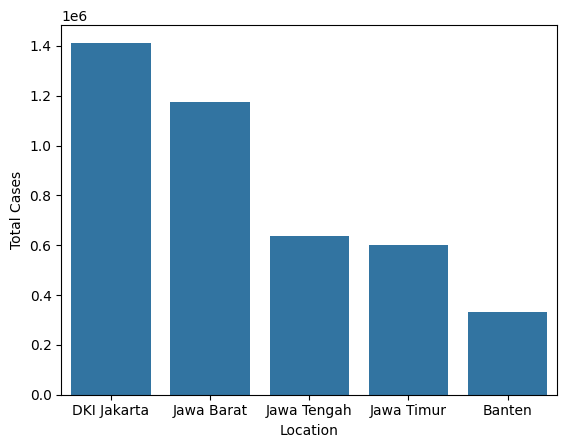

In [19]:
sns.barplot(x=top_5.index, y=top_5.values)
plt.xlabel('Location')
plt.ylabel('Total Cases')

In [20]:
data['Date'] = pd.to_datetime(data['Date'])

In [21]:
new_cases_sum = filtered_data.df().groupby('Date')['New Cases'].sum()
new_cases_sum

Date
2020-03-01       2
2020-03-02       3
2020-03-03       3
2020-03-04       3
2020-03-05       1
              ... 
2022-09-11    1939
2022-09-12     147
2022-09-13     191
2022-09-14    1900
2022-09-15    2642
Name: New Cases, Length: 929, dtype: int64

<Axes: xlabel='Date'>

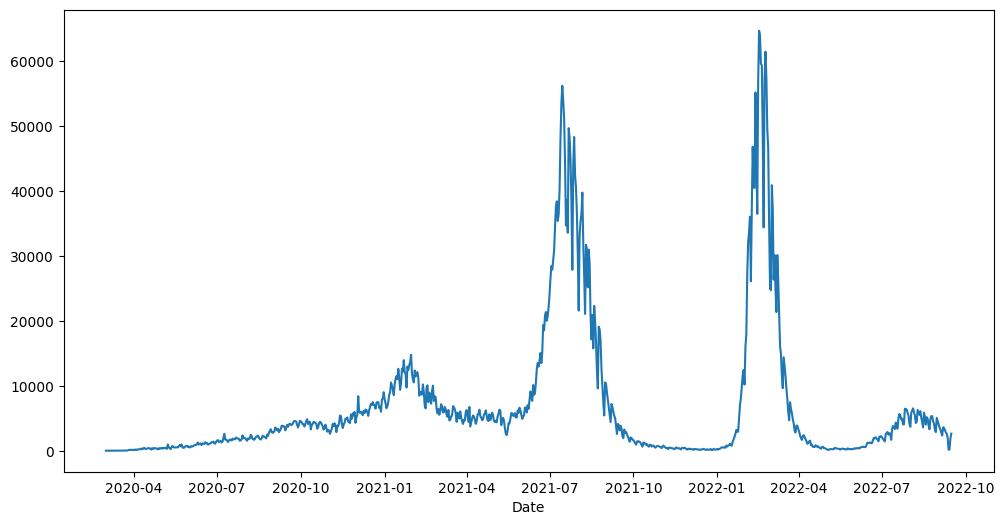

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=new_cases_sum.index, y=new_cases_sum.values)

Perbandingan total kasus, dan kasus yang telah selesai di banung

In [23]:
data_jakarta = db.query("SELECT * FROM data WHERE Location = 'DKI Jakarta' ").df()
new_data_jakarta =data_jakarta[['Total Cases', 'Total Deaths', 'Total Recovered']].max()
new_data_jakarta

Total Cases        1412511
Total Deaths         15513
Total Recovered    1386134
dtype: int64

<Axes: xlabel='None'>

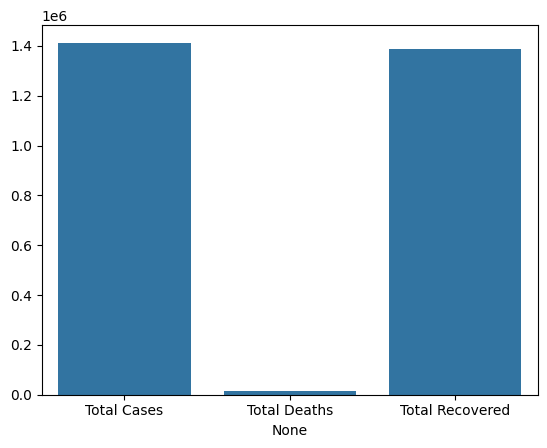

In [24]:
sns.barplot(x=new_data_jakarta.index, y = new_data_jakarta.values)

Perbandingan total case seluruh provinsi

In [25]:
all_province = filtered_data.df().groupby('Location')[['Total Cases','Total Deaths', 'Total Recovered']].max()
all_province = all_province.reset_index()
all_province

,Location,Total Cases,Total Deaths,Total Recovered
0,Aceh,44038,2223,41713
1,Bali,166831,4731,161629
2,Banten,333875,2950,328482
3,Bengkulu,29173,522,28617
4,DKI Jakarta,1412511,15513,1386134
5,Daerah Istimewa Yogyakarta,224307,5928,217712
6,Gorontalo,13951,487,13433
7,Jambi,38643,889,37681
8,Jawa Barat,1173731,15937,1144358
9,Jawa Tengah,636409,33489,601517


Grafik perbandingan total kasus di semua provinsi

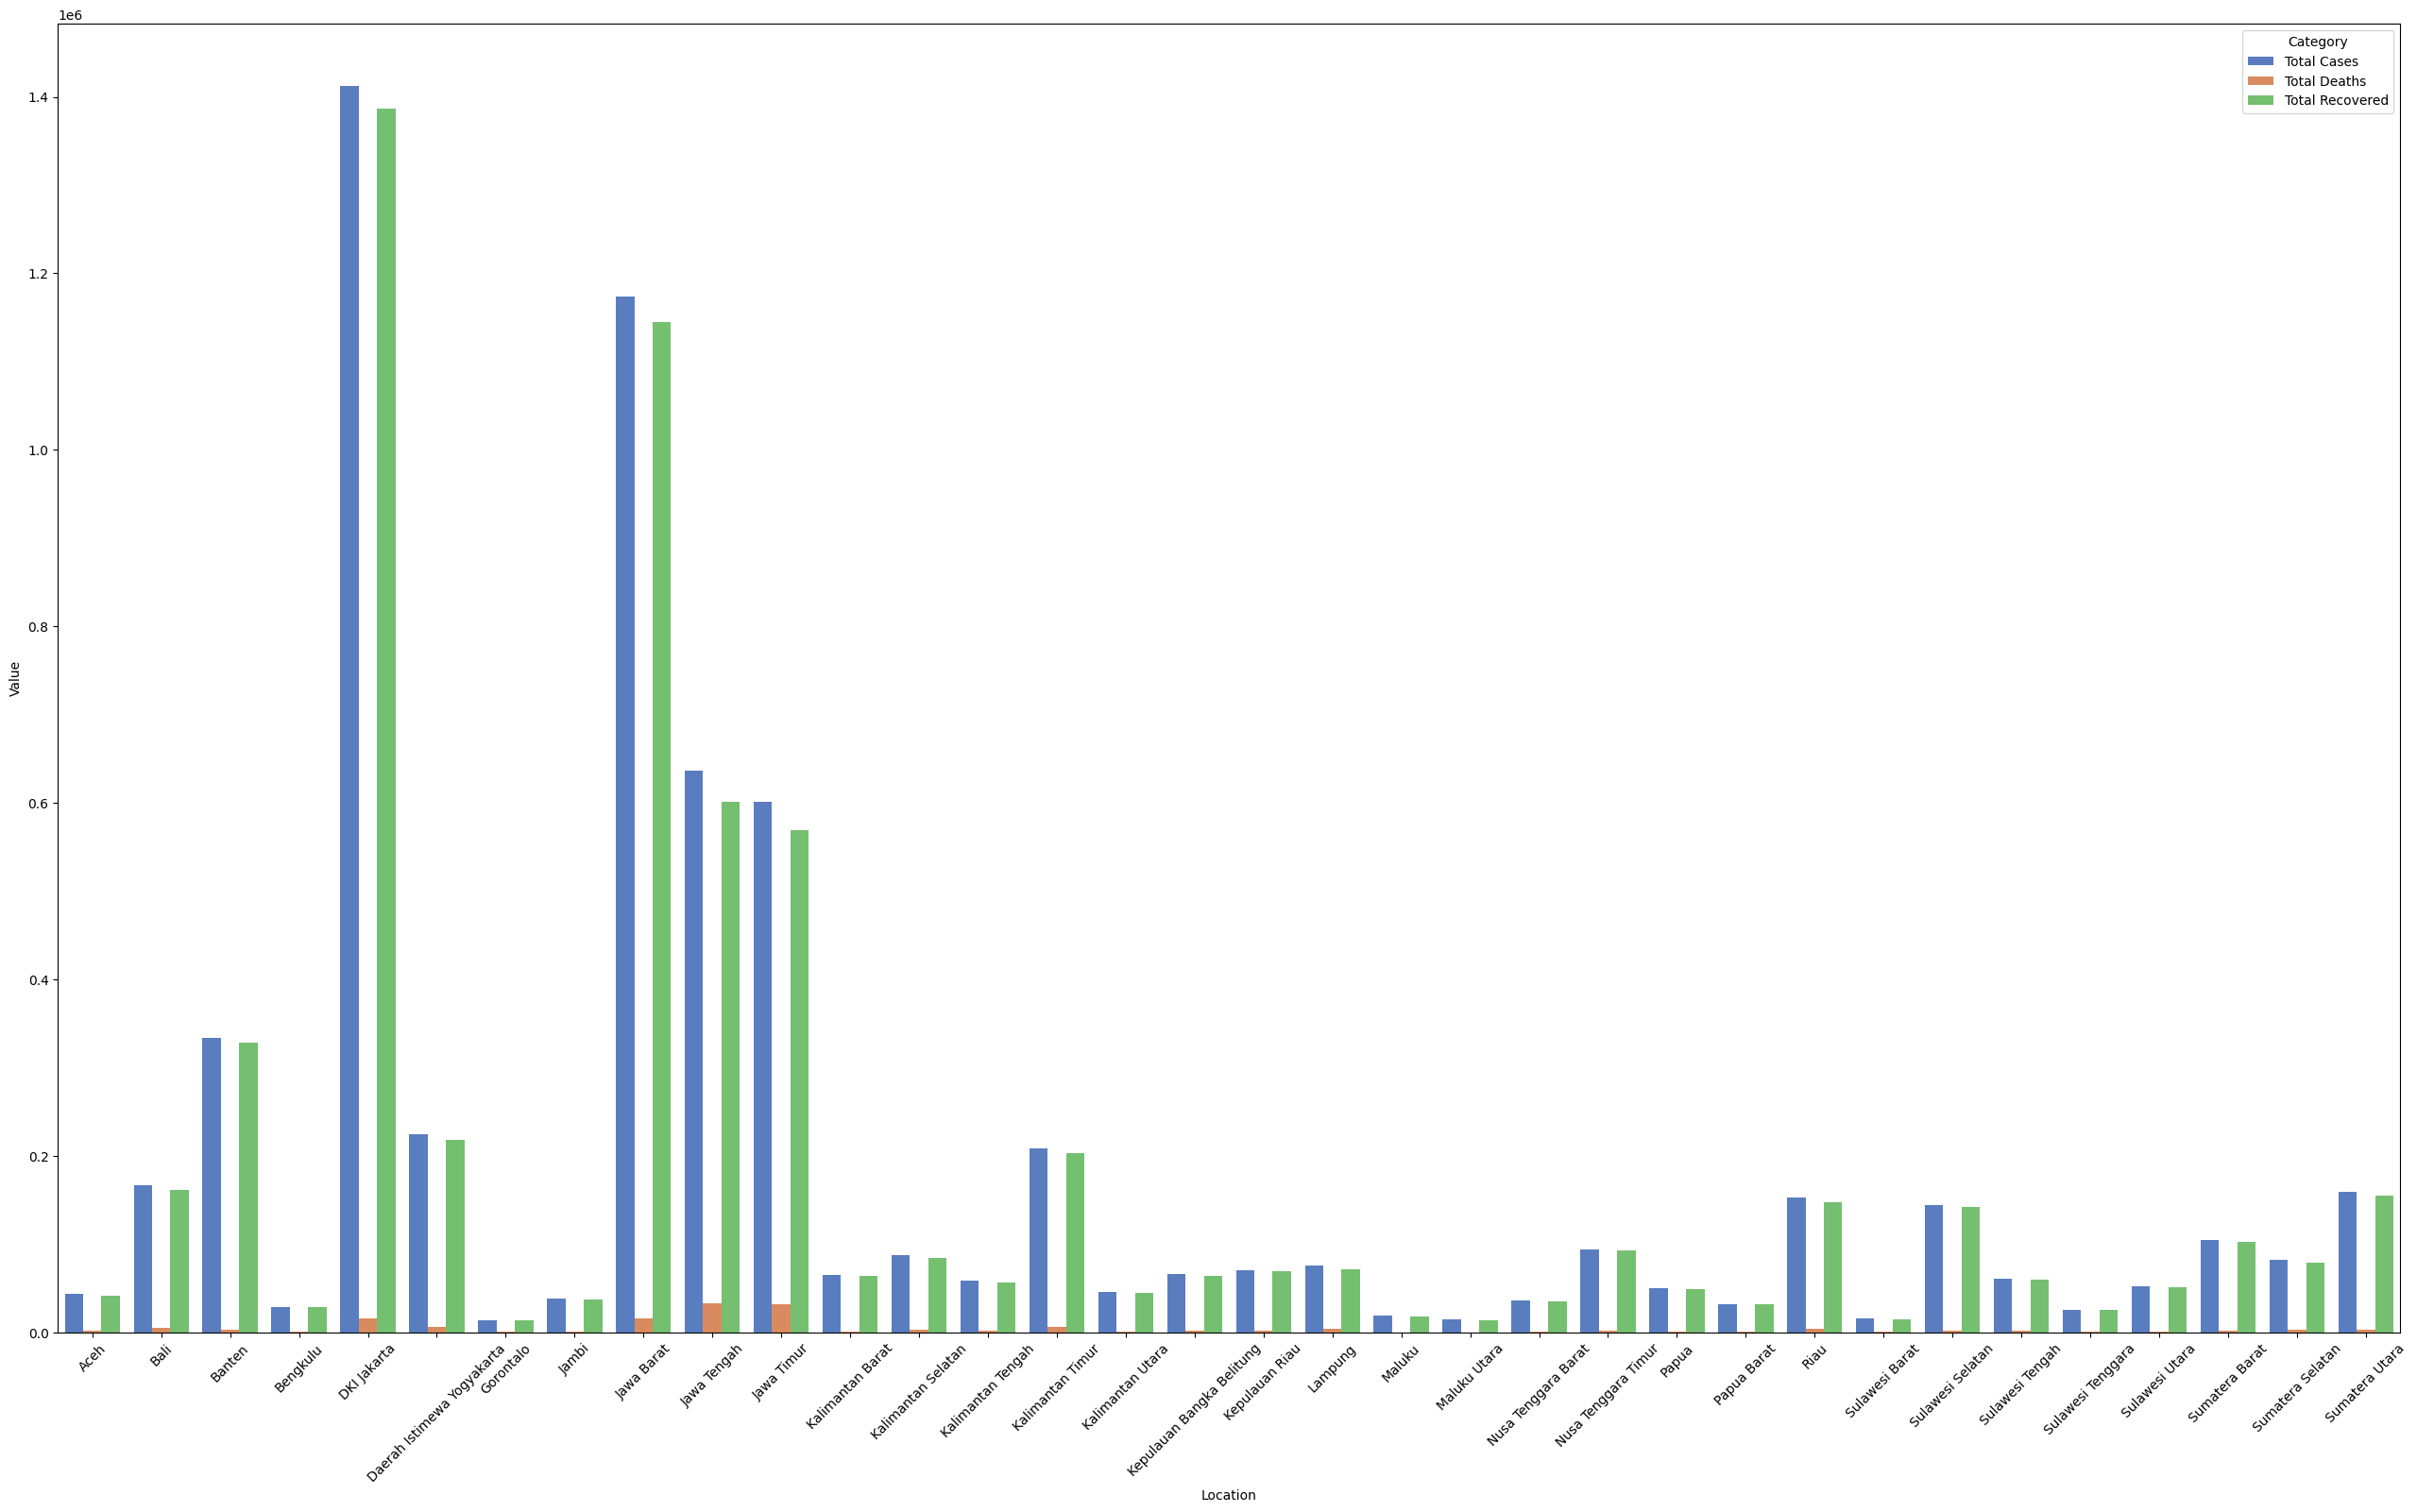

In [26]:
all_province_melted = all_province.melt(id_vars='Location', var_name='Category', value_name='Value')

plt.figure(figsize=(32, 18))
sns.barplot(x='Location', y='Value', hue='Category', data=all_province_melted, palette='muted')

plt.xticks(rotation=45)
plt.legend(title='Category')

Pie chart di berbagai pulau di indinesia

In [27]:
total_cases_island = filtered_data.df().groupby('Island')['Total Cases'].max()
total_cases_island

Island
Jawa             1412511
Kalimantan        209017
Maluku             18736
Nusa Tenggara     166831
Papua              49927
Sulawesi          144494
Sumatera          158866
Name: Total Cases, dtype: int64

Text(0.5, 1.0, 'Pie Chart Total Cases di berbagai Pulau di Indonesia')

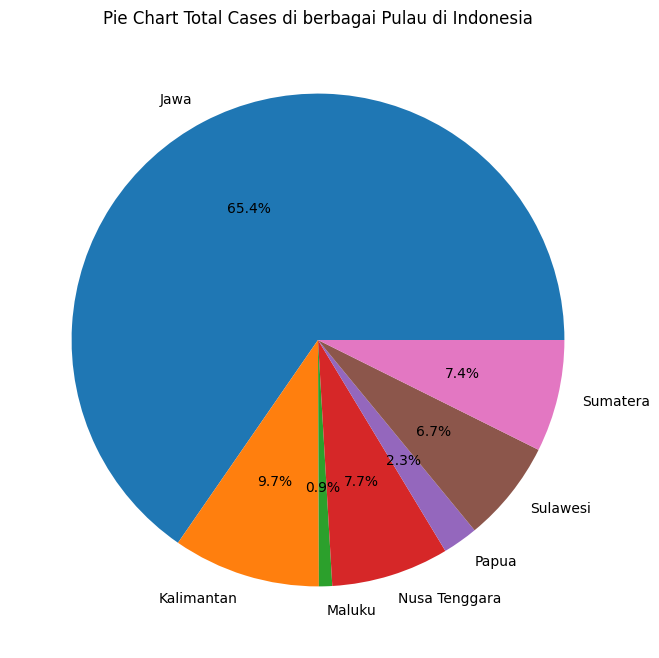

In [28]:
plt.figure(figsize=(8,8))
plt.pie(total_cases_island.values, labels=total_cases_island.index,autopct='%1.1f%%')
plt.title('Pie Chart Total Cases di berbagai Pulau di Indonesia')